In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy.optimize import curve_fit

data = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")
data_top = data.head()
# data_top

In [4]:
planet_name       = data.pl_name
disc_year         = data.disc_year
period            = data.pl_orbper          # [days]
period_unc_up     = data.pl_orbpererr1
period_unc_low    = data.pl_orbpererr2
semi_major_axis   = data.pl_orbsmax         # [AU]

radius            = data.pl_rade            # [Earth Radius]
radius_unc_up     = data.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low    = data.pl_radeerr2        # [Earth Radius] Lower Unc.
pl_mass_prov      = data.pl_bmassprov       # Planet Mass or Mass*sin(i) Provenance 
mass              = data.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up       = data.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low      = data.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density           = data.pl_dens            # [g/cm**3]
density_unc_up    = data.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low   = data.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
eccentricity      = data.pl_orbeccen 
planet_id_list    = list(range(0,len(planet_name)))
st_spectype       = data.st_spectype       # Spectral type of star

pl_eq             = data.pl_eqt            # [K] Equilibrium Temperature

In [14]:
old_STPM_candidate = []
new_STPM_candidate = []
for i in planet_id_list:
    if mass_unc_up[i]/mass[i] <= 0.25 and abs(mass_unc_low[i])/mass[i] <= 0.25 and radius_unc_up[i]/radius[i] <= 0.08 and abs(radius_unc_low[i])/radius[i] <= 0.08 and radius[i] <4 and isinstance(st_spectype[i],str) and "M" in st_spectype[i]:
        if disc_year[i] <= 2021:
           old_STPM_candidate.append(planet_id_list[i])
        else:
            new_STPM_candidate.append(planet_id_list[i])
STPM_candidate_id = old_STPM_candidate + new_STPM_candidate
#print(len(STPM_candidate_id),len(old_STPM_candidate),len(new_STPM_candidate),list(planet_name[STPM_candidate_id]))
print(planet_name[STPM_candidate_id[11]])

K2-3 b


2 radii: planet radii and planet to star ratio

Text(0.5, 1.0, 'STPMs')

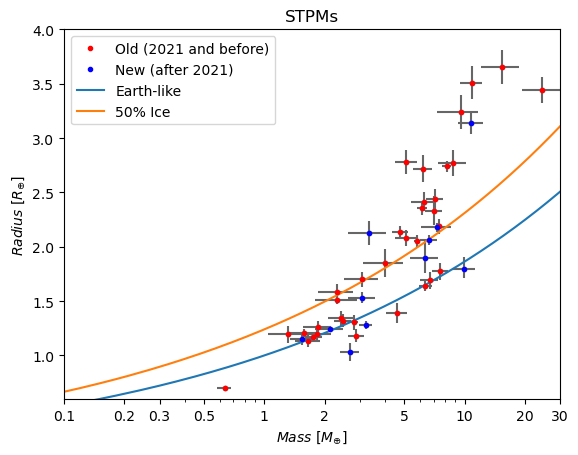

In [4]:
mass_up_lim    = data.pl_bmasseerr1[STPM_candidate_id]
mass_low_lim   = abs(data.pl_bmasseerr2[STPM_candidate_id])
mass_err       = [mass_low_lim,mass_up_lim]
radius_up_lim  = data.pl_radeerr1[STPM_candidate_id]
radius_low_lim = abs(data.pl_radeerr2[STPM_candidate_id])
radius_err     = [radius_low_lim,radius_up_lim]
plt.plot(mass[old_STPM_candidate],radius[old_STPM_candidate],'r.',label = "Old (2021 and before)")
plt.plot(mass[new_STPM_candidate],radius[new_STPM_candidate],'b.',label = "New (after 2021)")
plt.errorbar(mass[STPM_candidate_id], radius[STPM_candidate_id],xerr = mass_err, yerr=radius_err,fmt='.', color='0.4',zorder=-32)

# Radius - Mass curve
# From Zeng et. al (2019) https://www.pnas.org/doi/epdf/10.1073/pnas.1812905116
mass_range         = np.linspace(0,30,1000)
rocky_cores_radius = np.power(mass_range , 1/3.7)
plt.plot(mass_range,rocky_cores_radius,"-",label = "Earth-like",zorder=-32)

ice_part = 0.5
function = 1+ 0.55*ice_part-0.14*np.power(ice_part,2)
ice50_radius = np.power(mass_range , 1/3.7) * function
plt.plot(mass_range,ice50_radius,"-",label = "50% Ice",zorder=-32)


plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log")
plt.xlim(0.1,30)
plt.ylim(min(radius[STPM_candidate_id])-0.1,4)
plt.xticks([0.1,0.2,0.3,0.5,1,2,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","5","10","20", "30"],minor=False)
plt.legend()
plt.title("STPMs")

C:\Users\silke\AppData\Local\Temp\ipykernel_13612\295582665.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')


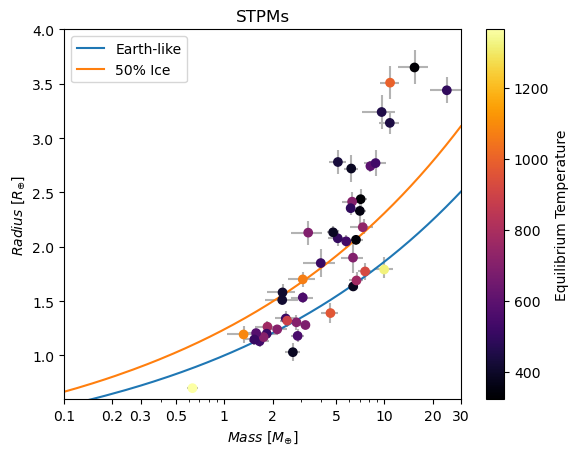

In [5]:
# mass_up_lim    = data.pl_bmasseerr1[STPM_candidate_id]
mass_low_lim   = abs(data.pl_bmasseerr2[STPM_candidate_id])
mass_err       = [mass_low_lim,mass_up_lim]
radius_up_lim  = data.pl_radeerr1[STPM_candidate_id]
radius_low_lim = abs(data.pl_radeerr2[STPM_candidate_id])
radius_err     = [radius_low_lim,radius_up_lim]
plt.errorbar(mass[STPM_candidate_id], radius[STPM_candidate_id],xerr = mass_err, yerr=radius_err,fmt='.', color='0.7',zorder=-32)

has_temp_eq_id = []
for i in STPM_candidate_id:
    if pl_eq[i] != "NaN":
        has_temp_eq_id.append(i)

# Create a colorscale based on the equilibrium temperature
norm = plt.Normalize(pl_eq[has_temp_eq_id].min(), pl_eq[has_temp_eq_id].max())
cmap = plt.cm.get_cmap('inferno')

# Create a scatter plot with error bars and colorscale
plt.scatter(mass[has_temp_eq_id], radius[has_temp_eq_id], c=pl_eq[has_temp_eq_id], cmap=cmap, norm=norm, marker='o')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Equilibrium Temperature')


# Radius - Mass curve
# From Zeng et. al (2019) https://www.pnas.org/doi/epdf/10.1073/pnas.1812905116
mass_range         = np.linspace(0,30,1000)
rocky_cores_radius = np.power(mass_range , 1/3.7)
plt.plot(mass_range,rocky_cores_radius,"-",label = "Earth-like",zorder=-32)

ice_part = 0.5
function = 1+ 0.55*ice_part-0.14*np.power(ice_part,2)
ice50_radius = np.power(mass_range , 1/3.7) * function
plt.plot(mass_range,ice50_radius,"-",label = "50% Ice",zorder=-32)


plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","5","10","20", "30"],minor=False)
plt.title("STPMs")
plt.xlim(0.1,30)
plt.ylim(min(radius[STPM_candidate_id])-0.1,4)
plt.legend()

C:\Users\silke\AppData\Local\Temp\ipykernel_13612\54010257.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')


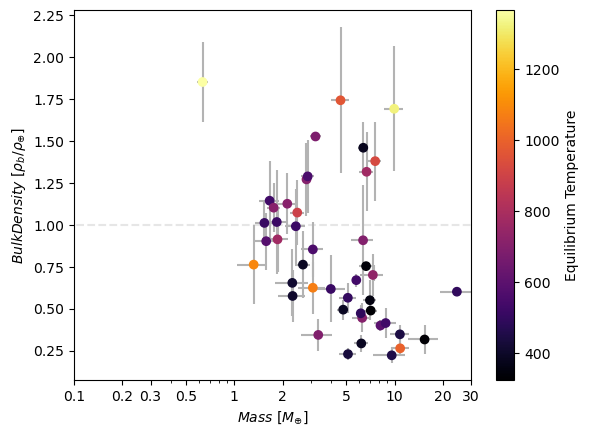

In [6]:
earth_density   = 5.51 # [g/cm**3]
mass_up_lim     = data.pl_bmasseerr1[STPM_candidate_id]
mass_low_lim    = abs(data.pl_bmasseerr2[STPM_candidate_id])
mass_err        = [mass_low_lim,mass_up_lim]
density_up_lim  = data.pl_denserr1[STPM_candidate_id]/earth_density
density_low_lim = abs(data.pl_denserr1[STPM_candidate_id])/earth_density
density_err     = [density_low_lim,density_up_lim]
plt.hlines(1,0,30,color = "0.9",linestyles="dashed",zorder=-40)
plt.errorbar(mass[STPM_candidate_id], density[STPM_candidate_id]/earth_density,xerr = mass_err, yerr=density_err,fmt='.', color='0.7',zorder=-32)
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{\oplus}]$")
plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","5","10","20", "30"],minor=False)

plt.xlim(0.1,30)
# Create a colorscale based on the equilibrium temperature
norm = plt.Normalize(pl_eq[has_temp_eq_id].min(), pl_eq[has_temp_eq_id].max())
cmap = plt.cm.get_cmap('inferno')

# Create a scatter plot with error bars and colorscale
plt.scatter(mass[has_temp_eq_id], density[has_temp_eq_id]/earth_density, c=pl_eq[has_temp_eq_id], cmap=cmap, norm=norm, marker='o')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Equilibrium Temperature')

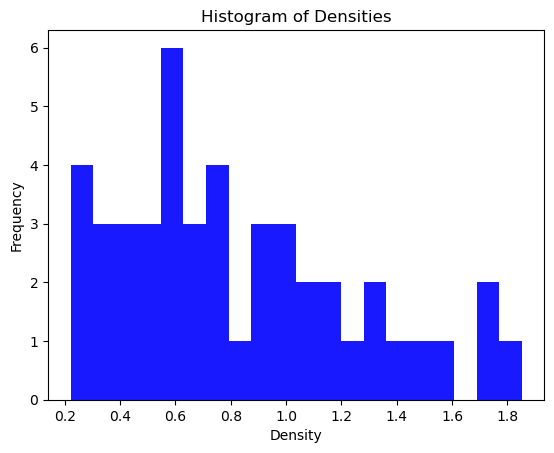

In [7]:
# mass[STPM_candidate_id]
# radius[STPM_candidate_id]
# density[STPM_candidate_id]
# old_STPM_candidate

densities  = np.array(density[STPM_candidate_id]/earth_density)
densities  = densities.reshape(-1, 1)
plt.hist(densities, bins=20, color='blue', alpha=0.9)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Histogram of Densities')
plt.show()

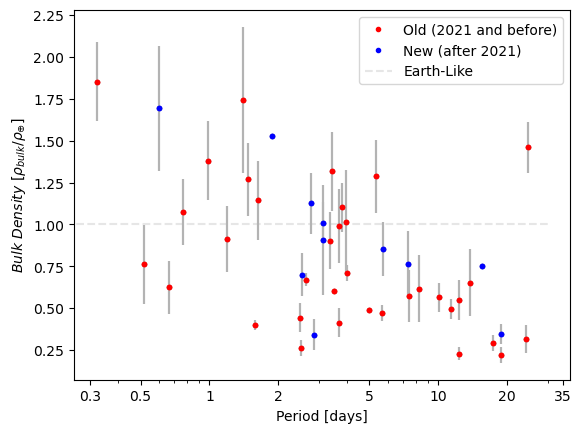

In [15]:
earth_density   = 5.51 #[g/cm**3]

period_up_lim    = period_unc_up[STPM_candidate_id]
period_low_lim   = abs(period_unc_low[STPM_candidate_id])
period_err       = [period_low_lim,period_up_lim]

plt.plot(period[old_STPM_candidate],density[old_STPM_candidate]/earth_density,'r.',label = "Old (2021 and before)")
plt.plot(period[new_STPM_candidate],density[new_STPM_candidate]/earth_density,'b.',label = "New (after 2021)")


density_up_lim  = data.pl_denserr1[STPM_candidate_id]/earth_density
density_low_lim = abs(data.pl_denserr1[STPM_candidate_id])/earth_density
density_err     = [density_low_lim,density_up_lim]
plt.hlines(1,0,30,color = "0.9",linestyles="dashed",zorder=-40,label = "Earth-Like")

plt.errorbar(period[STPM_candidate_id], density[STPM_candidate_id]/earth_density, xerr = period_err,yerr=density_err,fmt='.', color = "0.7",zorder=-32)
plt.xlabel("Period [days]")
plt.ylabel("$Bulk\ Density\ [ρ_{bulk} / ρ_{\oplus}]$")
plt.xscale("log")
plt.xticks([0.3,0.5,1,2,5,10,20, 35],["0.3","0.5","1","2","5","10","20", "35"],minor=False)
plt.legend()
plt.show()

In [9]:
planet_name       = data.pl_name
disc_year         = data.disc_year
period            = data.pl_orbper          # [days]
semi_major_axis   = data.pl_orbsmax         # [AU]

radius            = data.pl_rade            # [Earth Radius]
radius_unc_up     = data.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low    = data.pl_radeerr2        # [Earth Radius] Lower Unc.
pl_mass_prov      = data.pl_bmassprov       # Planet Mass or Mass*sin(i) Provenance 
mass              = data.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up       = data.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low      = data.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density           = data.pl_dens            # [g/cm**3]
density_unc_up    = data.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low   = data.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
eccentricity      = data.pl_orbeccen 
planet_id_list    = list(range(0,len(planet_name)))
st_spectype       = data.st_spectype       # Spectral type of star

pl_eq             =  data.pl_eqt           # [K] Equilibrium Temperature

for i in planet_id_list:
    relative_uncertainty_mass = (mass_unc_up[i] - mass_unc_low[i]) / (2 * mass[i]) * 100
    relative_uncertainty_radius = (radius_unc_up[i] - radius_unc_low[i]) / (2 * radius[i]) * 100
    if relative_uncertainty_mass <= 25.0 and relative_uncertainty_radius <= 8 and radius[i] <4 and isinstance(st_spectype[i],str) and "M" in st_spectype[i]:
        if disc_year[i] <= 2021:
           old_STPM_candidate.append(planet_id_list[i])
        else:
            new_STPM_candidate.append(planet_id_list[i])
STPM_candidate_id = old_STPM_candidate + new_STPM_candidate


([<matplotlib.axis.XTick at 0x22e243e7890>,
 [Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6, 0, '0.6'),
  Text(0.7, 0, '0.7'),
  Text(0.8, 0, '0,8'),
  Text(0.9, 0, '0.9'),
  Text(1.0, 0, '1')])

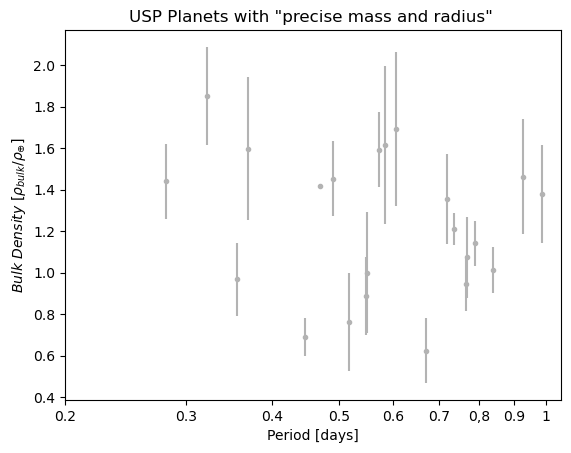

In [17]:
small_USP_id = []
for i in planet_id_list:
    relative_uncertainty_mass = (mass_unc_up[i] - mass_unc_low[i]) / (2 * mass[i]) * 100
    relative_uncertainty_radius = (radius_unc_up[i] - radius_unc_low[i]) / (2 * radius[i]) * 100
    if relative_uncertainty_mass <= 25.0 and relative_uncertainty_radius <= 8 and radius[i] <4 and period[i]<1:
        small_USP_id.append(i)

period_up_lim    = period_unc_up[small_USP_id]
period_low_lim   = abs(period_unc_low[small_USP_id])
period_err       = [period_low_lim,period_up_lim]

density_up_lim  = data.pl_denserr1[small_USP_id]/earth_density
density_low_lim = abs(data.pl_denserr1[small_USP_id])/earth_density
density_err     = [density_low_lim,density_up_lim]

#plt.hlines(1,0,30,color = "0.9",linestyles="dashed",zorder=-40)
plt.errorbar(period[small_USP_id], density[small_USP_id]/earth_density, xerr = period_err, yerr=density_err,fmt='.', color='0.7',zorder=-32)
plt.xlabel("Period [days]")
plt.ylabel("$Bulk\ Density\ [ρ_{bulk} / ρ_{\oplus}]$")
plt.title("USP Planets with \"precise mass and radius\" ")
plt.xscale("log")
plt.xticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],["0.2","0.3","0.4","0.5","0.6","0.7","0,8","0.9","1"],minor=False)
